# Regression Analysis in Python

*This lesson is adapted from [Penn State's Regression Lesson Plan](https://onlinecourses.science.psu.edu/stat501/node/250)*

**Regression** is a statistical technique that tries to measure the strength of a relationship between a single **dependent variable (response)** and one or more **independent variables (predictors)**. Regression is an example of using supervised learning for continuous data. 

Regression is a popular technique in data science for prediction and forecasting because:
1. Speedy analysis (relative to other ML methods)
2. Highly explainable
3. Easy to run 
4. Generally robust prediction technique, especially with multiple predictors

## Simple Linear Regression
In simple linear regression, there are two variables: an "x", which is the single predictor variable, and a "y" , which is the single response variable. With simple linear regression, we are looking at a nondeterministic relationship between the x and the y. 

In general, we are looking for some kind of "trend" between the two variables. 

Let's import a couple of packages to view some graphs. 
Don't worry about the code for now! We'll go over that soon!

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

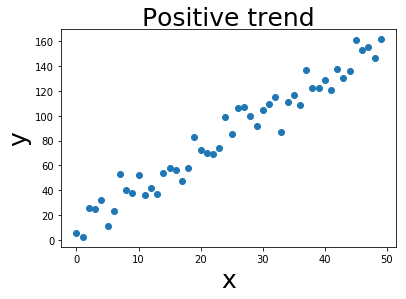

In [35]:
x = np.arange(0,50)
y = 10 + 3*x + np.random.normal(0, 10, 50)
plt.xlabel("x", fontsize=25)
plt.ylabel("y", fontsize=25)
plt.title("Positive trend",fontsize=25)
plt.scatter(x, y)
plt.show()

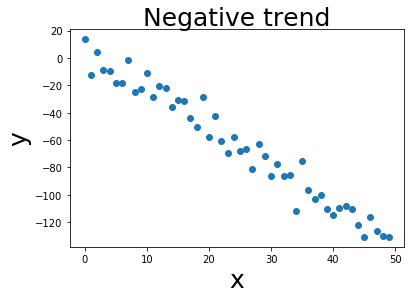

In [36]:
x = np.arange(0,50)
y = 10 - 3*x + np.random.normal(0, 10, 50)
plt.xlabel("x", fontsize=25)
plt.ylabel("y", fontsize=25)
plt.title("Negative trend",fontsize=25)
plt.scatter(x, y)
plt.show()

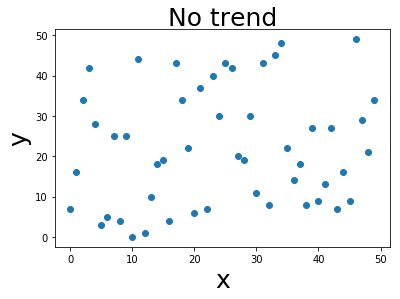

In [37]:
x = np.arange(0,50)
y = np.random.randint(0,50, 50)
plt.xlabel("x", fontsize=25)
plt.ylabel("y", fontsize=25)
plt.title("No trend",fontsize=25)
plt.scatter(x, y)
plt.show()

For statistical relationships with a trend, we can graph a line that best fits the points. This line is literally called the **line of best fit**, a very fitting name indeed. This line may not necessarily hit all the points in the graph, but it will be pretty close, depending on how strong the trend is. 

To understand the formula for the line of best fit, we must learn some terminology.

* x<sub>i</sub> is an individual predictor value 
* y<sub>i</sub> is an individual observed response value (the "actual" value)
* ŷ<sub>i</sub> is an indididual predicted response values ("the "fitted" value)

(x<sub>i</sub>, y<sub>i</sub>) = actual data point for a given x<sub>i</sub>

(x<sub>i</sub>, ŷ<sub>i</sub>) = predicted data point for a given x<sub>i</sub>


___


The formula for the line of best fit is ŷ<sub>i</sub> = b<sub>0</sub>+b<sub>1</sub> * x<sub>i</sub>

* b<sub>0</sub> is the ŷ-intercept (value when x is 0)
* b<sub>1</sub> is the slope of the line of best fit

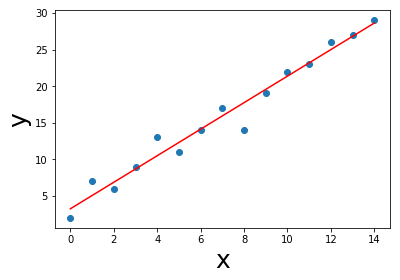

In [10]:
x = np.arange(0,15)
y = np.array([2,7,6,9,13,11,14,17,14,19,22,23,26,27,29])
plt.xlabel("x", fontsize=25)
plt.ylabel("y", fontsize=25)
plt.scatter(x, y)

params = np.polyfit(x,y,1)
slope = params[0]
y_intercept = params[1]

# best fit line
y_hat = y_intercept+slope*x

plt.plot(x, y_hat, color="red")

print()
plt.show()

### Ordinary Least Squares 
So how does np.polyfit work? 

There are several ways to fit a set of data points and create a line of best fit. We'll focus on the method of **ordinary least squares (OLS) ** to figure out the slope and y-intercept of the best fit line.

To understand OLS, we have to first understand the **residual error**, which is the difference between the observed response and predicted response. 

e<sub>i</sub> = y<sub>i</sub>)- ŷ<sub>i</sub> 

Residual is: -3.74761904762


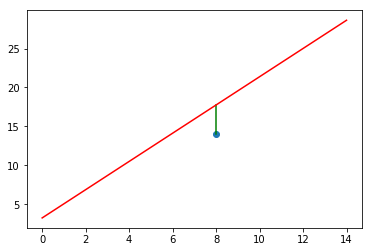

In [13]:
plt.scatter([8],[14])
plt.plot([8,8], [14,y_hat[8]], color="green")
plt.plot(x, y_hat, color="red")
print("Residual is: " + str(14-y_hat[8]))

What if we look at the sum of the residuals? 

Residual sum is: 0.0


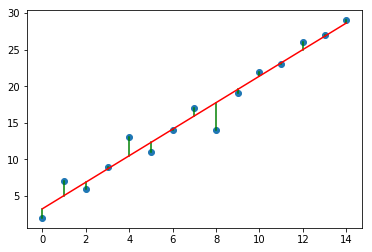

In [18]:
plt.scatter(x,y)
residuals = np.array([])
for i in range(15):
    plt.plot([i,i], [y[i],y_hat[i]], color="green")
    np.append(residuals, y[i]-y_hat[i])
plt.plot(x, y_hat, color="red")
print("Residual sum is: " + str(np.sum(residuals)))

The sum of residuals in an OLS best fit line will always equal 0. To totally understand this, you will need to know calculus. Here's the link to an explanation if you're interested: [proof](https://math.stackexchange.com/questions/494181/why-the-sum-of-residuals-equals-0-when-we-do-a-sample-regression-by-ols). 

What we really want to do for OLS is minimize the sum of the squares of the residual residuals (SSE). This is bascially minimizing the errors, so the line is really best fit.

SSE = Σ [(y<sub>i</sub> - ŷ<sub>i</sub>)<sup>2</sup>] = Σ (e<sub>i</sub>)<sup>2</sup>

We use squared errors because 
 1. Everything is positive (squares are always positive)
 2. It imposes a "penalty" for larger errors
     * A residual that is of size 2 has a penalty of 4
     * A residual that is of size 3 has a penalty of 9
     * Though 3 is one unit away from 2, the penalty for 3 is much stronger than that of 2
 
 
With OLS, we can derive formulas to find the slope and y-intercept for the best-fitting line. 

b<sub>1</sub> = Σ [(x<sub>i</sub>-x̅)*(y<sub>i</sub>-ȳ)] /  Σ (x<sub>i</sub>-x̅)<sup>2</sup>

b<sub>0</sub> = ȳ - b<sub>1</sub> * x̅


Here's the derivation for the formulas if you are interested. You will need to have a good understanding of calculus: [proof](https://isites.harvard.edu/fs/docs/icb.topic515975.files/OLSDerivation.pdf) 
    
___

### Exercise
Let's get back to coding! 
In the Week 4 folder, check out the Excel file called "crickets", which I got from this [site](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html). Figure out what the appropriate x and y variables are, graph the relationship (label your axes please!), and state the formula for line of best fit in the title. 

### Correlation
In many cases, we have to know how well 